In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
READINGS_FILE_TABLE_JPEG = "spo2_readings_table_jpeg.csv"
READINGS_FILE_HAND_JPEG = "spo2_readings_hand_jpeg.csv"

In [4]:
dfs = {
    READINGS_FILE_TABLE_JPEG: pd.read_csv(READINGS_FILE_TABLE_JPEG),
    READINGS_FILE_HAND_JPEG: pd.read_csv(READINGS_FILE_HAND_JPEG),
}

df_table = pd.read_csv(READINGS_FILE_TABLE_JPEG)
df_hand = pd.read_csv(READINGS_FILE_HAND_JPEG)


In [5]:
def plot_time_sequence(df, column_to_plot):
    # Calculate the mean of the column
    mean_value = df[column_to_plot].mean()

    # Create a figure and axis
    plt.figure(figsize=(10, 6))

    # Plot the individual 'Ratio Red' values
    # We use the DataFrame's index for the x-axis
    plt.plot(df.index, df[column_to_plot], marker='o', linestyle='--', label=f'{column_to_plot} Values')

    # Plot the mean line
    # plt.axhline draws a horizontal line across the plot
    plt.axhline(y=mean_value, color='red', linestyle='-', linewidth=2,
                label=f'Mean = {mean_value:.4f}')

    # Add titles and labels
    plt.title(f'Plot of {column_to_plot} Values and their Mean')
    plt.xlabel('Data Point Index')
    plt.ylabel(column_to_plot)

    # Add a legend to identify the plots
    plt.legend()

    # Add a grid for easier reading
    plt.grid(True)

    # Display the plot
    # In many Python environments (like Jupyter or a local script),
    # plt.show() will open a window with your plot.
    # If saving to a file, you would use:
    # plt.savefig('ratio_red_plot.png')
    plt.show()

In [6]:
def plot_time_sequence_multi(column_to_plot):
    """
    Plot the same time series column from multiple DataFrames on the same graph.

    Parameters:
    - column_to_plot: str
        Column name to plot from each DataFrame.
    """
    plt.figure(figsize=(10, 6))

    # for df, label in zip(dfs, labels):
    for label, df in dfs.items():
        # Plot the time series
        plt.plot(df.index, df[column_to_plot], marker='o', linestyle='--', label=label)

        # Plot the mean line for each DataFrame
        mean_value = df[column_to_plot].mean()
        plt.axhline(y=mean_value, linestyle='-', linewidth=1.5, alpha=0.7, label=f"{label} Mean = {mean_value:.4f}")

    # Add titles and labels
    plt.title(f'Comparison of {column_to_plot} Across Multiple DataFrames')
    plt.xlabel('Index')
    plt.ylabel(column_to_plot)

    # Add legend and grid
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [7]:
def plot_gaussian(df, column_to_plot):
    """
    Plot a Gaussian (normal) distribution representing the mean and standard deviation
    of the selected column in the global DataFrame `df`.

    Parameters
    ----------
    column_to_plot : str
        The name of the column in df to analyze.
    """
    # Compute statistics
    mu = df[column_to_plot].mean()
    sigma = df[column_to_plot].std()

    # Create the x range for the Gaussian
    x = np.linspace(mu - 5*sigma, mu + 5*sigma, 400)
    pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

    # Create a figure
    plt.figure(figsize=(10, 6))

    # Plot the Gaussian curve
    plt.plot(x, pdf, label=f'Gaussian PDF (μ={mu:.4f}, σ={sigma:.4f})', color='blue')

    # Fill ±1σ region
    plt.fill_between(x, pdf, where=(x >= mu - sigma) & (x <= mu + sigma),
                     alpha=0.3, color='blue', label='±1σ region')

    # Draw mean line
    plt.axvline(mu, color='red', linestyle='--', linewidth=2, label='Mean (μ)')

    # Add titles and labels
    plt.title(f'Gaussian Representation of "{column_to_plot}"')
    plt.xlabel(column_to_plot)
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)

    plt.show()

In [8]:
def plot_gaussian_multi(column_to_plot):
    """
    Plot Gaussian (normal) distributions for the selected column in multiple DataFrames.

    Parameters
    ----------
    column_to_plot : str
        Column name to analyze in each DataFrame.
    """
    plt.figure(figsize=(10, 6))

    # Store means and stds for Z-value calculations
    stats = {}

    for label, df in dfs.items():
        # Compute statistics
        mu = df[column_to_plot].mean()
        sigma = df[column_to_plot].std()
        stats[label] = (mu, sigma)

        # x range covering ±5σ
        x = np.linspace(mu - 5*sigma, mu + 5*sigma, 400)
        pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

        # Plot the Gaussian curve
        plt.plot(x, pdf, label=f'{label} PDF (μ={mu:.4f}, σ={sigma:.4f})')

        # Fill ±1σ region
        plt.fill_between(x, pdf, where=(x >= mu - sigma) & (x <= mu + sigma),
                         alpha=0.2)

        # Draw mean line
        plt.axvline(mu, linestyle='--', linewidth=1.5, alpha=0.7)

    # Compute pairwise Z-values
    print("Pairwise Z-values of compatibility:")
    for (label1, (mu1, sigma1)), (label2, (mu2, sigma2)) in combinations(stats.items(), 2):
        # Z-value formula for two independent Gaussians
        z = abs(mu1 - mu2) / np.sqrt(sigma1**2 + sigma2**2)
        print(f"{label1} vs {label2}: Z = {z:.4f}")

    # Titles and labels
    plt.title(f'Gaussian Representation of "{column_to_plot}" Across Multiple Series')
    plt.xlabel(column_to_plot)
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Plot Ratio Red

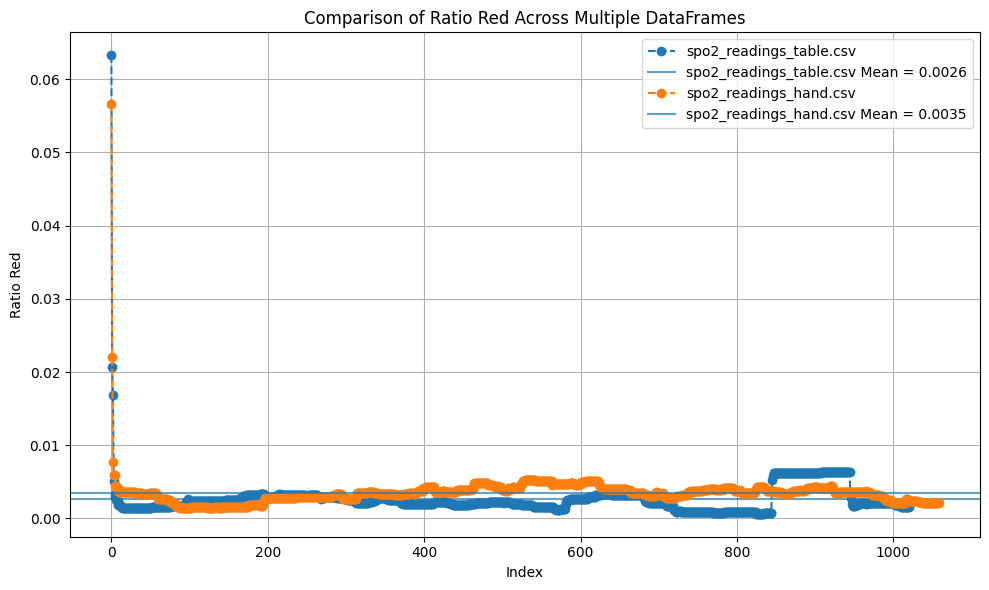

Pairwise Z-values of compatibility:
spo2_readings_table.csv vs spo2_readings_hand.csv: Z = 0.2673


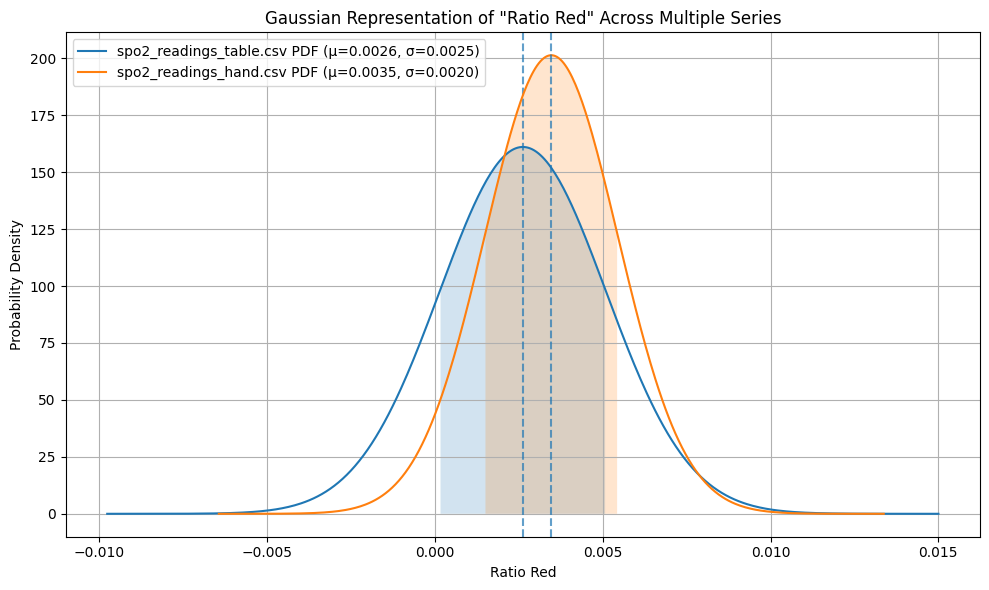

In [9]:
# Select the column to plot
column_to_plot = 'Ratio Red'

plot_time_sequence_multi(column_to_plot)
plot_gaussian_multi(column_to_plot)




## Plot Ratio Green

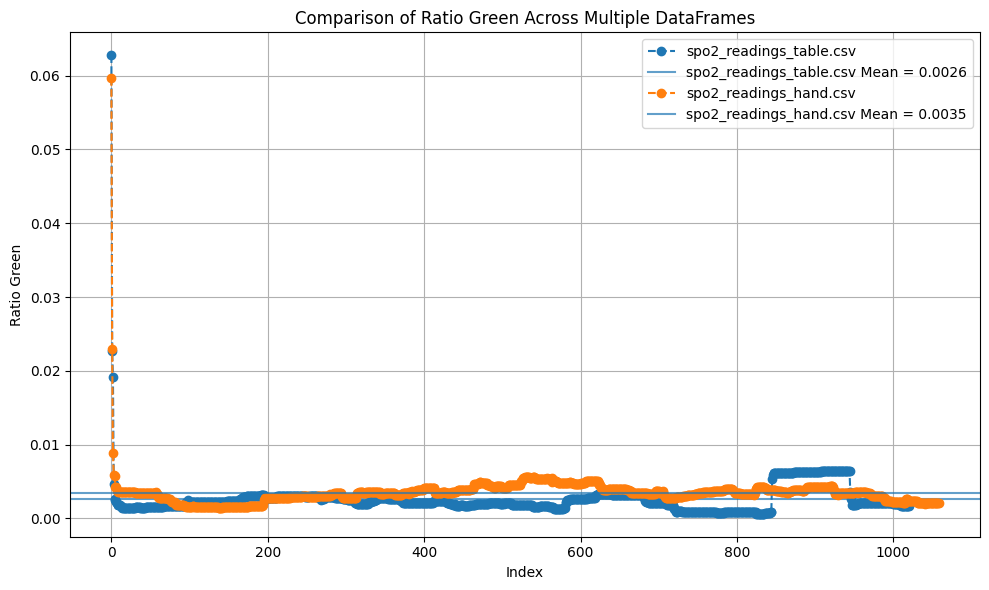

Pairwise Z-values of compatibility:
spo2_readings_table.csv vs spo2_readings_hand.csv: Z = 0.2722


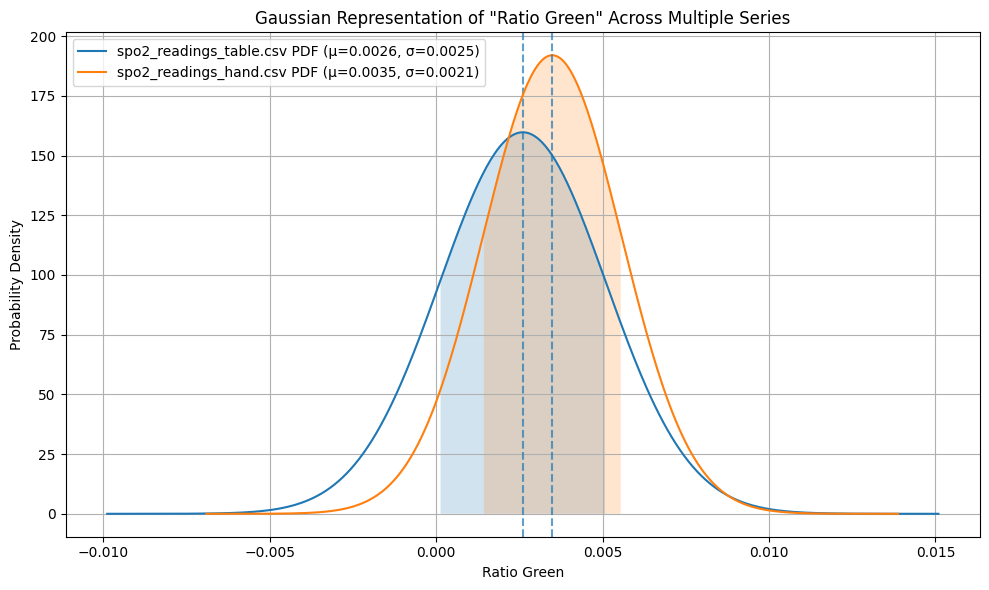

In [10]:
column_to_plot = 'Ratio Green'

plot_time_sequence_multi(column_to_plot)
plot_gaussian_multi(column_to_plot)

## Plot RoR

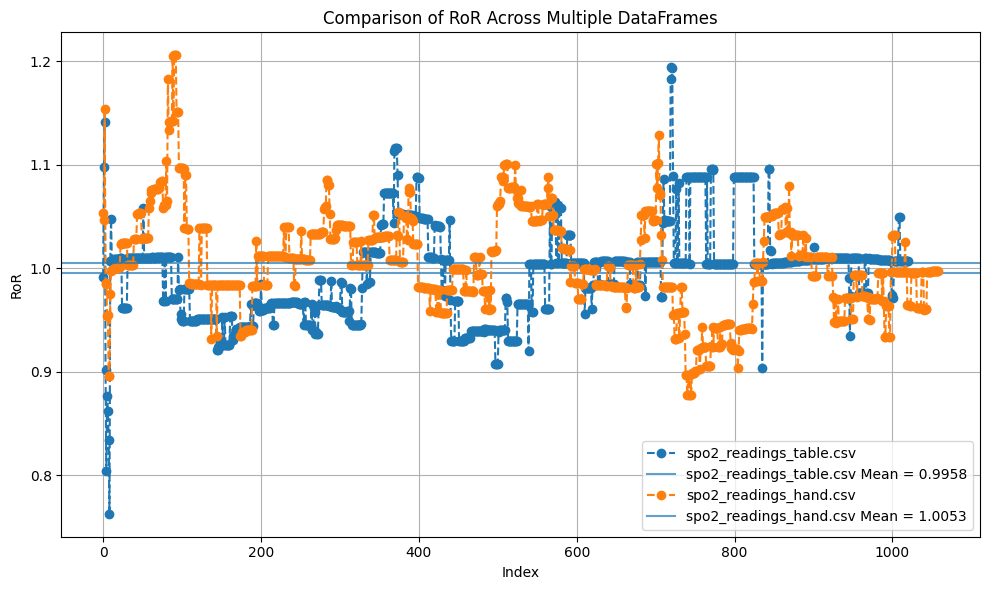

Pairwise Z-values of compatibility:
spo2_readings_table.csv vs spo2_readings_hand.csv: Z = 0.1461


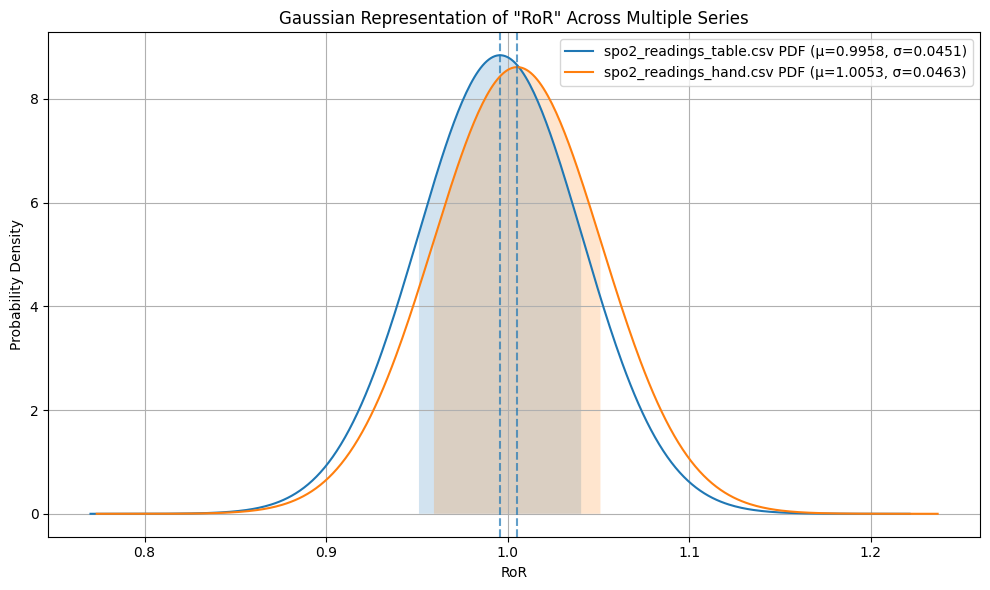

In [11]:
column_to_plot = 'RoR'

plot_time_sequence_multi(column_to_plot)
plot_gaussian_multi(column_to_plot)